<a href="https://colab.research.google.com/github/souzamatt01/DNC-Desafio-6/blob/main/RID145536_Desafio06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Contexto:

Você trabalha em uma plataforma de streaming e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas. Eles acreditam que é possível prever se um usuário tem mais chance de deixar a plataforma antes que isso aconteça, e com base nessa informação tomar ações para reduzir o churn.

Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não. Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

## Sobre os dados

Uma adaptação do problema de ecommerce, disponível no [Kaggle](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction?select=E+Commerce+Dataset.xlsx). Acesse os dados aqui:

[streaming_data.csv](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/75a740fb-4146-455a-8d13-6a24ba56d2c8/streaming_data.csv)

Os dados fornecidos possuem informações sobre as contas dos clientes na plataforma de streaming, divididos entre contas Basic, Standard e Premium, onde cada uma oferece uma gama maior de serviços que a anterior.

| **Coluna** | **Descrição** | **Tipo**|
| --- | --- | --- |
| **client_id** | **Código de identificação do cliente** | **Int**|
| **age** | **Idade do cliente** | **Int**
| **gender** | **Gênero do cliente** | **String**
| **region** | **Região de Origem do Cliente** | **String**
| **subscription_days** | **Dias de assinatura ativa do cliente** | **Int**
| **subscription_type**| **Tipo de conta** | **String**
| **num_contents** | **Quantidade de conteúdos assistidos** | **Int**
| **avg_rating** | **Avaliação média dos conteúdos da plataforma** | **Int**
| **num_active_profiles** | **Número de perfis ativos na plataforma** | **Int**
|**num_streaming_services** | **Quantidade de serviços de streaming que o cliente possui** | **Int**
| **devices_connected** | **Quantidade de dispositivos conectados à conta** | **Int**
| **churned** | **Se o cliente cancelou a conta ou não** | **Int**




## Bibliotecas:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

## Etapa 01: Análise exploratória dos dados (Data Understanding)

In [ ]:
#Carregando o Dataset:
try:
  df = pd.read_csv('/content/streaming_data.csv')
except FileNotFoundError:
  print("Error: 'streaming_data.csv' not found.")
  exit()
except Exception as e:
  print(f"An error occurred while reading the file: {e}")
  exit()

In [ ]:
#Entendendo os dados:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
df.dtypes

,0
Age,float64
Gender,object
Time_on_platform,float64
Devices_connected,float64
Subscription_type,object
Num_streaming_services,float64
Num_active_profiles,int64
Avg_rating,float64
Churned,float64
User_id,object


In [ ]:
#Checando valores faltantes:
df.isna().sum()

,0
Age,11277
Gender,14516
Time_on_platform,21420
Devices_connected,25188
Subscription_type,25221
Num_streaming_services,68312
Num_active_profiles,0
Avg_rating,17270
Churned,16736
User_id,0


In [ ]:
na_data = df.isna()

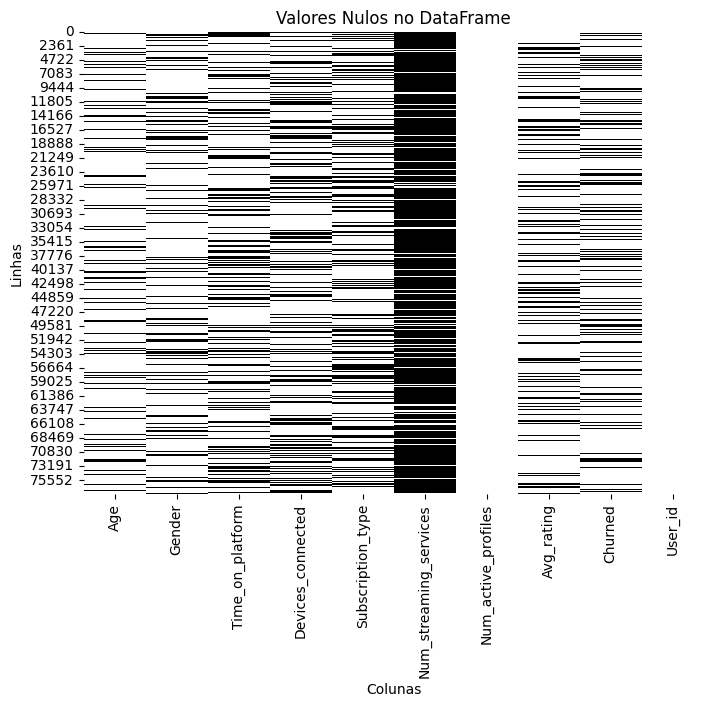

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(na_data, cmap='binary' ,cbar=False)
plt.title('Valores Nulos no DataFrame')
plt.xlabel('Colunas')
plt.ylabel('Linhas')
plt.show()

## Etapa 02: Tratamento dos Dados (Data Preparation)

In [ ]:
#Substituir valores “NaN” por 0:
cols_to_fill = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[cols_to_fill] = df[cols_to_fill].fillna(0)

In [ ]:
#Dropar linhas nulas:
lines_to_drop = ['Gender', 'Subscription_type', 'Age']
df.dropna(subset=lines_to_drop, inplace=True)

In [ ]:
df.isna().sum()

,0
Age,0
Gender,0
Time_on_platform,0
Devices_connected,0
Subscription_type,0
Num_streaming_services,0
Num_active_profiles,0
Avg_rating,0
Churned,0
User_id,0


In [ ]:
#Transformando valores em 'Churned':
df['Churned'] = df['Churned'].replace({0: 'No', 1: 'Yes'})

In [ ]:
#Transformando valores floats em valores inteiros:
float_cols = df.select_dtypes(include=np.float64).columns
df[float_cols] = df[float_cols].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     36515 non-null  int64 
 1   Gender                  36515 non-null  object
 2   Time_on_platform        36515 non-null  int64 
 3   Devices_connected       36515 non-null  int64 
 4   Subscription_type       36515 non-null  object
 5   Num_streaming_services  36515 non-null  int64 
 6   Num_active_profiles     36515 non-null  int64 
 7   Avg_rating              36515 non-null  int64 
 8   Churned                 36515 non-null  object
 9   User_id                 36515 non-null  object
dtypes: int64(6), object(4)
memory usage: 3.1+ MB


##Etapa 03: Modelagem dos Dados - Regressão Logística

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [ ]:
#Aplicando o Label Encoder nas colunas necessárias:
le = LabelEncoder()
le.fit(df['Gender'])
df['Gender'] = le.transform(df['Gender'])
le.fit(df['Subscription_type'])
df['Subscription_type'] = le.transform(df['Subscription_type'])
le.fit(df['Churned'])
df['Churned'] = le.transform(df['Churned'])
le.fit(df['User_id'])
df['User_id'] = le.transform(df['User_id'])

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,1,4700,3,0,0,3,0,0,19499
1,69,0,6107,2,2,0,1,2,0,30498
2,44,1,6374,3,1,1,1,1,1,308
3,26,1,0,5,0,0,2,0,0,23377
5,54,1,3024,2,0,0,1,0,0,19436


In [ ]:
#Definindo as variáveis X e y para o modelo:
X = df.drop(['User_id'], axis=1)
y = df['Churned']

In [ ]:
#Separando em train e test:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
#Modelando:
model = LogisticRegression()
lr = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
X_test["prediction"] = y_pred

y_test = pd.DataFrame(y_test)

X_test["real"] = y_test["Churned"]
X_test.head()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,prediction,real
41622,26,0,8362,1,0,0,2,3,0,0,0
51362,53,0,0,2,2,0,2,1,0,0,0
74226,67,1,6827,0,0,0,2,4,1,1,1
39743,46,0,3809,2,2,0,5,0,0,0,0
67221,30,1,8354,0,2,0,4,2,0,0,0


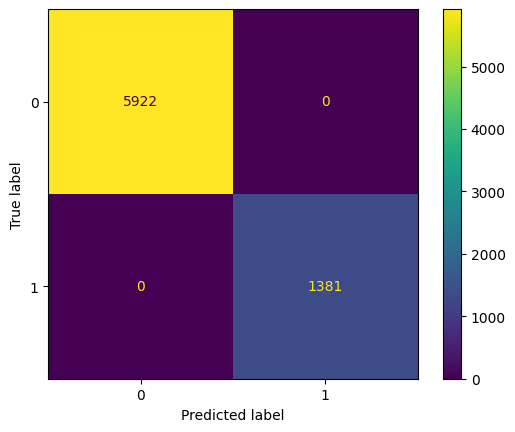

In [ ]:
#Plotando o Confusion Matrix:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [ ]:
#Printando as métricas:
X_test_for_prediction = X_test.drop(["prediction", "real"], axis=1)
lr.predict(X_test_for_prediction)
X_test_for_prediction = X_test.drop(["prediction", "real"], axis=1)

metricas = {
    "model": ["Logistic Regression", "Logistic Regression"],
    "mode": ["treino", "teste"],
    "accuracy": [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test_for_prediction))],
    "balanced_accuracy":[balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test_for_prediction))],
    "f1_score": [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test_for_prediction))]
}
pd.DataFrame(metricas)


,model,mode,accuracy,balanced_accuracy,f1_score
0,Logistic Regression,treino,1.0,1.0,1.0
1,Logistic Regression,teste,1.0,1.0,1.0


## Etapa 04: Modelagem dos Dados - Tunning + Etapa 05: Random Forest

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,1,4700,3,0,0,3,0,0,19499
1,69,0,6107,2,2,0,1,2,0,30498
2,44,1,6374,3,1,1,1,1,1,308
3,26,1,0,5,0,0,2,0,0,23377
5,54,1,3024,2,0,0,1,0,0,19436


In [ ]:
#Definindo X e y:
X = df.drop(['Churned'], axis=1)
y = df['Churned']
y = pd.DataFrame(y)

In [ ]:
#Separando em train e test:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

In [ ]:
#Aplicando arove de decisões:
arvore = DecisionTreeClassifier()
arvore.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#Checando a acurácia:
print(f"Accuracia Treino:{accuracy_score(y_train, arvore.predict(X_train))}")
print(f"Accuracia Teste:{accuracy_score(y_test, arvore.predict(X_test))}")

Accuracia Treino:1.0
Accuracia Teste:0.7603724496782144


In [ ]:
parameters = {
"max_depth":[1,2,3,4,5,6,7,8,9,10]
}

grid_search = GridSearchCV(arvore, parameters, scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)
grid_search = GridSearchCV(arvore, parameters, scoring="accuracy", cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

grid_search.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
arvore_tunned = DecisionTreeClassifier(
ccp_alpha = 0.0,
class_weight = None,
criterion = 'gini',
max_depth = 1,
max_features = None,
max_leaf_nodes = None,
min_impurity_decrease = 0.0,
min_samples_leaf = 1,
min_samples_split = 2,
min_weight_fraction_leaf = 0.0,
random_state = None,
splitter = 'best'
)

In [ ]:
arvore_tunned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [ ]:
#Checando novamente a acurácia:
print(f"Accuracia Treino:{accuracy_score(y_train, arvore_tunned.predict(X_train))}")
print(f"Accuracia Teste:{accuracy_score(y_test, arvore_tunned.predict(X_test))}")

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

print(f"Accuracia Treino:{accuracy_score(y_train, rf.predict(X_train))}")
print(f"Accuracia Teste:{accuracy_score(y_test, rf.predict(X_test))}")

Accuracia Treino:0.8067574969190744
Accuracia Teste:0.8067917294262632


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracia Treino:1.0
Accuracia Teste:0.856360399835684


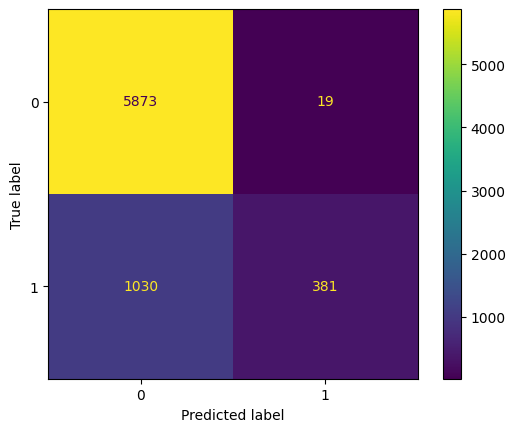

In [ ]:
#Matrix de Confusão:
cm = confusion_matrix(y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()